In [519]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [520]:
import numpy as np
import pandas as pd
from scapy.all import *
from statistics import mean, stdev
from fingerprinting import perform_crossval

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [521]:
try:
    data_set = pd.read_csv("fingerprinting.csv", index_col = "Unnamed: 0")
except Exception as e:
    data_set = load_data()
    data_set.to_csv("fingerprinting.csv")

features = data_set[["Number packets", "Total time", "Bytes Sent by Server", "Average Time Between Packets", "Std Time Between Packets"]].to_numpy()
labels = data_set["Cell"].to_numpy()

accuracy = perform_crossval(features, labels, folds=10, nb_estimators = 200)
print("Accuracy of current model: ", accuracy*100,"%")

Accuracy of current model:  68.65 %


## Feature Importance

In [523]:
clf = RandomForestClassifier()
clf.fit(features, labels)

RandomForestClassifier()

In [524]:
importances = clf.feature_importances_
std = np.std([
tree.feature_importances_ for tree in clf.estimators_], axis=0)

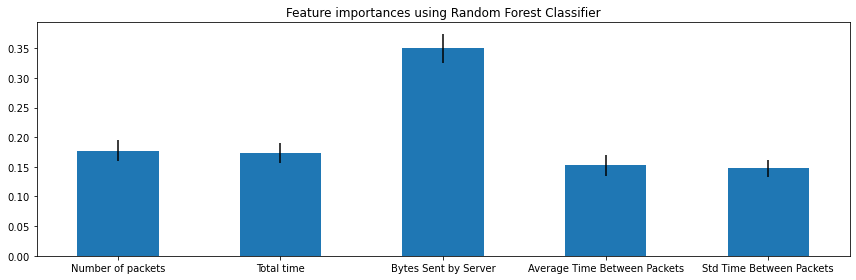

In [525]:
import pandas as pd
forest_importances = pd.Series(importances, index=["Number of packets", "Total time", "Bytes Sent by Server", "Average Time Between Packets", "Std Time Between Packets"])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, rot = 0,figsize = (12,4))
ax.set_title("Feature importances using Random Forest Classifier")
fig.tight_layout()

In [522]:
fig.savefig("feature_importance.jpg")